# Project : Deposit Loan Bank

  Hello guys and girls ! Today we gonna  continue the same project or we work with **Naive Bayes and Logistic Regression** .Now we gonna work with the ensemble models : **Decisions Trees, Random Forest and GradientBoosting**. But I know gradientBoosting you can classify that in the boosting models but is the ensemble like Random forest is like almost the same process with Gradient Boosting . So it's that I'm classify this in the ensemble . Last time when we make the models with Naive Bayes( We gonna work again with this to see in the deep with derivates models to come to GaussianNB in the futur) and Logistic Regression , we have seen **the precision and recall** for the people to subscribe is very low and not equality . So today , we gonna see if ensembles models gonna resolve this well and try to have good distribution between differents classes. So let's go.

In [373]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_curve,roc_auc_score,auc
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import joblib
import warnings
warnings.filterwarnings("ignore")

In [375]:
bank_df = pd.read_csv("bank-full.csv",sep=";")

col_cat = ["job", "marital", "education", "contact", "month", "poutcome","loan","default","housing"]
col_num = ["balance", "campaign", "duration", "pdays", "previous", "day"]

X = bank_df[col_cat+col_num]
y = bank_df["y"].map({"no":0,"yes":1})

In [377]:
bank_pipeline = joblib.load("pipeline_bank.pkl")

bank_pipeline

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'marital', 'education', 'contact',
                                  'month', 'poutcome']),
                                ('num',
                                 Pipeline(steps=[('minmax', MinMaxScaler()),
                                                 ('robust', RobustScaler()),
                                                 ('standard',
                                                  StandardScaler())]),
                                 ['balance', 'campaign', 'duration', 'pdays',
                                  'previous', 'day'])])

In [379]:
#To transform X in the dataframe
if isinstance(X, pd.Series):
    X = X.to_frame()

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=434)

# Transformation of X_train and X_test
X_train_transformed = bank_pipeline.fit_transform(X_train).toarray()
X_test_transformed = bank_pipeline.transform(X_test).toarray()  

# Features Names
feature_names = bank_pipeline.get_feature_names_out()

# Conversion on DataFrame
X_train_transformed = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)

### Tree Decision

******************** Classification Report ********************
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      9972
           1       0.61      0.45      0.52      1331

    accuracy                           0.90     11303
   macro avg       0.77      0.71      0.73     11303
weighted avg       0.89      0.90      0.89     11303



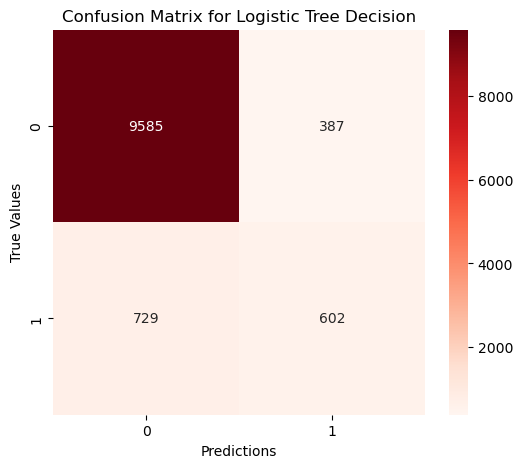

In [384]:
model_tree = DecisionTreeClassifier(max_depth=14,random_state=434,min_samples_leaf=14,max_features=20,min_samples_split=100,max_leaf_nodes=130000)

model_tree.fit(X_train_transformed,y_train)

y_pred_tree = model_tree.predict(X_test_transformed)

print(20*"*","Classification Report","*"*20)

print(classification_report(y_test,y_pred_tree))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, cmap="Reds", fmt="d")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.title("Confusion Matrix for Logistic Tree Decision")
plt.show()

### Random Forest

******************** Classification Report ********************
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9972
           1       0.65      0.43      0.51      1331

    accuracy                           0.91     11303
   macro avg       0.79      0.70      0.73     11303
weighted avg       0.89      0.91      0.90     11303



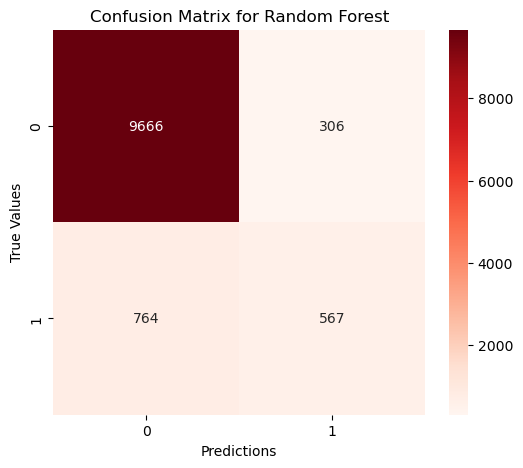

In [387]:
model_forest = RandomForestClassifier(random_state=434, max_leaf_nodes=130000,verbose=0,n_jobs=5,criterion="gini"
                      ,min_samples_split=10,min_samples_leaf=20,bootstrap=False,n_estimators=100,max_features=20)

model_forest.fit(X_train_transformed,y_train)

y_pred_forest = model_forest.predict(X_test_transformed)

print(20*"*","Classification Report","*"*20)

print(classification_report(y_test,y_pred_forest))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot=True, cmap="Reds", fmt="d")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.title("Confusion Matrix for Random Forest")
plt.show()

### GradientBoosting

******************** Classification Report ********************
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      9972
           1       0.63      0.46      0.53      1331

    accuracy                           0.90     11303
   macro avg       0.78      0.71      0.74     11303
weighted avg       0.89      0.90      0.90     11303



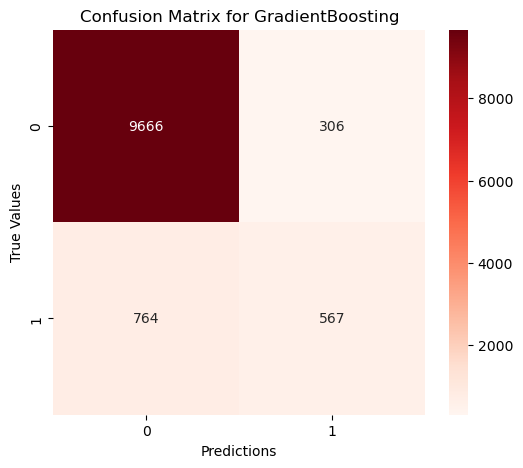

In [389]:
model_GB = GradientBoostingClassifier(random_state=434, max_leaf_nodes=130000,verbose=0,learning_rate =0.9,subsample =0.5
                      ,min_samples_split=10,min_samples_leaf=20,n_estimators=100,max_features=20)

model_GB.fit(X_train_transformed,y_train)

y_pred_gb = model_GB.predict(X_test_transformed)

print(20*"*","Classification Report","*"*20)

print(classification_report(y_test,y_pred_gb))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot=True, cmap="Reds", fmt="d")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.title("Confusion Matrix for GradientBoosting")
plt.show()

### Conclusion 1

We can see in all the three models we train the best of them if we take all the parameters is **GradientBoosting**. but we gonna see later with the AUC_Score who is the and who predict the people to go follow in the bank.But we can see the balance between differents classes is so much unfair so we gonna use **SMOTE** to balance the differents classes. Let's go.

### SMOTE

In [393]:
# SMOTE to have better balance between classe
smote = SMOTE(random_state=434)
X_resampled, y_resampled = smote.fit_resample(X_train_transformed, y_train)

# Checking after SMOTE is apply
counter_before = Counter(y_train)
counter_after = Counter(y_resampled)

counter_before, counter_after

(Counter({0: 29950, 1: 3958}), Counter({0: 29950, 1: 29950}))

******************** Classification Report ********************
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9972
           1       0.56      0.55      0.55      1331

    accuracy                           0.90     11303
   macro avg       0.75      0.74      0.75     11303
weighted avg       0.89      0.90      0.89     11303



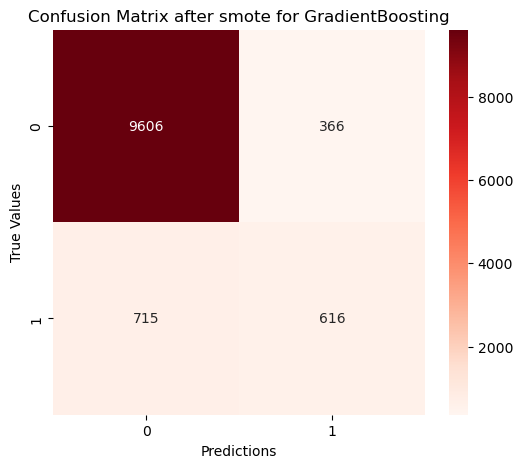

In [394]:
model_GB.fit(X_resampled,y_resampled)

y_pred_forest = model_GB.predict(X_test_transformed)

print(20*"*","Classification Report","*"*20)

print(classification_report(y_test,y_pred_forest))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, cmap="Reds", fmt="d")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.title("Confusion Matrix after smote for GradientBoosting")
plt.show()

******************** Classification Report ********************
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      9972
           1       0.51      0.73      0.60      1331

    accuracy                           0.89     11303
   macro avg       0.74      0.82      0.77     11303
weighted avg       0.91      0.89      0.89     11303



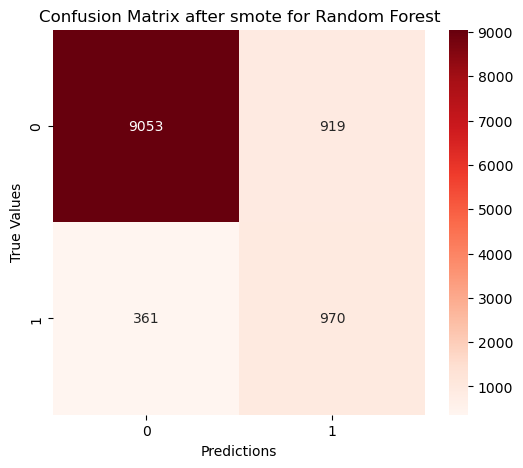

In [395]:
model_forest.fit(X_resampled,y_resampled)

y_pred_forest = model_forest.predict(X_test_transformed)

print(20*"*","Classification Report","*"*20)

print(classification_report(y_test,y_pred_forest))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot=True, cmap="Reds", fmt="d")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.title("Confusion Matrix after smote for Random Forest")
plt.show()

******************** Classification Report ********************
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      9972
           1       0.40      0.74      0.52      1331

    accuracy                           0.84     11303
   macro avg       0.68      0.80      0.71     11303
weighted avg       0.90      0.84      0.86     11303



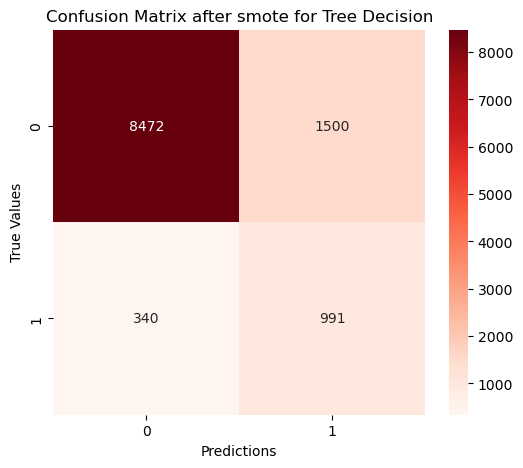

In [397]:
model_tree.fit(X_resampled,y_resampled)

y_pred_tree = model_tree.predict(X_test_transformed)

print(20*"*","Classification Report","*"*20)

print(classification_report(y_test,y_pred_tree))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, cmap="Reds", fmt="d")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.title("Confusion Matrix after smote for Tree Decision")
plt.show()

### Conclusion 2

We can see smote help so much to balance the data on differents class and we have the **recall** boosted so much so now model don't confuse so much the class. But in general the model is **Random Forest**. But AUC_SCORE gonna give which is the best between the 3.

### ROC Curve before SMOTE anf after SMOTE

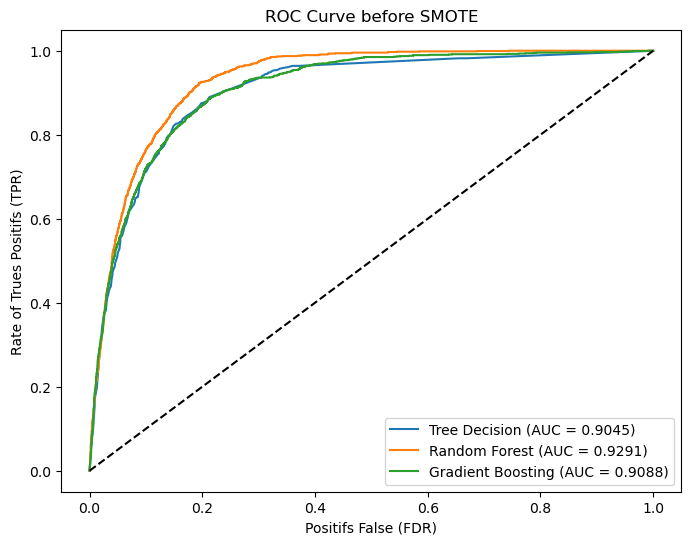

In [401]:
### ROC Curve before SMOTE

models = [
    ("Tree Decision",DecisionTreeClassifier(max_depth=14,random_state=434,min_samples_leaf=14,max_features=20
                                            ,min_samples_split=100,max_leaf_nodes=130000)),
     ("Random Forest",RandomForestClassifier(random_state=434, max_leaf_nodes=130000,verbose=0,n_jobs=5,criterion="gini"
                      ,min_samples_split=10,min_samples_leaf=20,bootstrap=False,n_estimators=100,max_features=20)),
     ("Gradient Boosting", GradientBoostingClassifier(random_state=434, max_leaf_nodes=130000,verbose=0,learning_rate =0.9,subsample =0.5
                      ,min_samples_split=10,min_samples_leaf=20,n_estimators=100,max_features=20))
]

plt.figure(figsize=(8,6))

for name,model in models:

    model.fit(X_train_transformed,y_train)

    y_proba = model.predict_proba(X_test_transformed)[:,1]

    fpr,tpr, _ = roc_curve(y_test,y_proba)
    roc_auc = auc(fpr,tpr)

    plt.plot(fpr,tpr, label=f"{name} (AUC = {roc_auc:.4f})")

#-------------------------------------------------------------------------------------------------------------------------------------------------------

plt.plot([0,1],[0,1], 'k--')
plt.xlabel("Positifs False (FDR)")
plt.ylabel("Rate of Trues Positifs (TPR)")
plt.title("ROC Curve before SMOTE")
plt.legend()
plt.show()

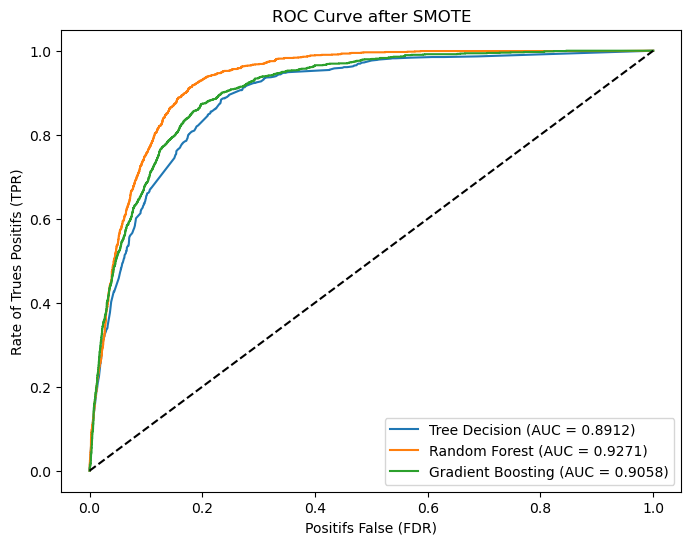

In [402]:
### ROC_curve after SMOTE

plt.figure(figsize=(8,6))

for name,model in models:

    model.fit(X_resampled,y_resampled)

    y_proba = model.predict_proba(X_test_transformed)[:,1]

    fpr,tpr, _ = roc_curve(y_test,y_proba)
    roc_auc = auc(fpr,tpr)

    plt.plot(fpr,tpr, label=f"{name} (AUC = {roc_auc:.4f})")

#-------------------------------------------------------------------------------------------------------------------------------------------------------

plt.plot([0,1],[0,1], 'k--')
plt.xlabel("Positifs False (FDR)")
plt.ylabel("Rate of Trues Positifs (TPR)")
plt.title("ROC Curve after SMOTE")
plt.legend()
plt.show()

### Conclusion 3

In general with the AUC the best model is eventually the **Random Forest** for this case is outperform the others models almost far. So we gonna use him to see what the features have so much importances in this case and impact so much to the target.

### Features Importances

In [406]:
# Encoded columns to have same lenght like features importances in the model
X_encoded = pd.get_dummies(X, drop_first=True)
model_forest.fit(X_encoded, y)

# Take features names and importances in the model
feature_names = X_encoded.columns
importances = model_forest.feature_importances_

# Create a dataframe to take features and theirs importances
df_importances = pd.DataFrame({
    "Features":feature_names,
    "Importances": importances})

# To have the original Name for each column
def get_original_col(feature_name):
    return feature_name.split("_")[0]

df_importances["OriginalColumn"] = df_importances["Features"].apply(get_original_col)

df_grouped = df_importances.groupby("OriginalColumn")["Importances"].sum().reset_index()
df_grouped.sort_values("Importances", ascending=False, inplace=True)

print(df_grouped)


   OriginalColumn  Importances
5        duration     0.431335
13       poutcome     0.167191
11          month     0.116056
3             day     0.054856
12          pdays     0.052278
0         balance     0.040159
7         housing     0.038838
2         contact     0.029377
14       previous     0.014962
8             job     0.014210
1        campaign     0.013960
10        marital     0.011752
6       education     0.008628
9            loan     0.006374
4         default     0.000024


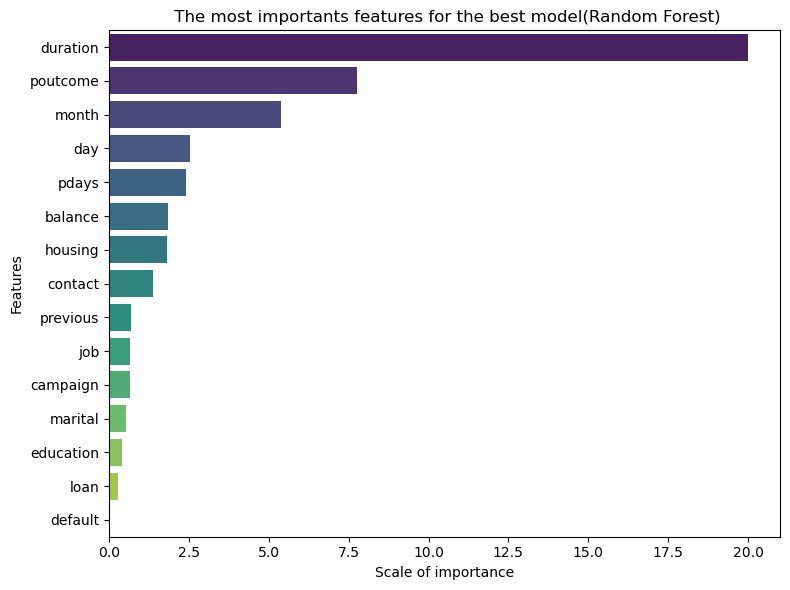

In [408]:
# Scale in range and visualize the top features
scaler = MinMaxScaler(feature_range=(0, 20))
df_grouped["ScaledImportance"] = scaler.fit_transform(df_grouped[["Importances"]])

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_grouped,
    x="ScaledImportance",
    y="OriginalColumn",
    palette="viridis"
)
plt.xlabel("Scale of importance")
plt.ylabel("Features")
plt.title(" The most importants features for the best model(Random Forest)")
plt.tight_layout()
plt.show()

### Conclusion 4

So the feature have most importance is the **Duration** is outperform so well the second to close him. So we gonna make now the **Decisions Boundaries** to see what the differents is distribued on this case.

### Limit Boundaries in 2D for the differents classes

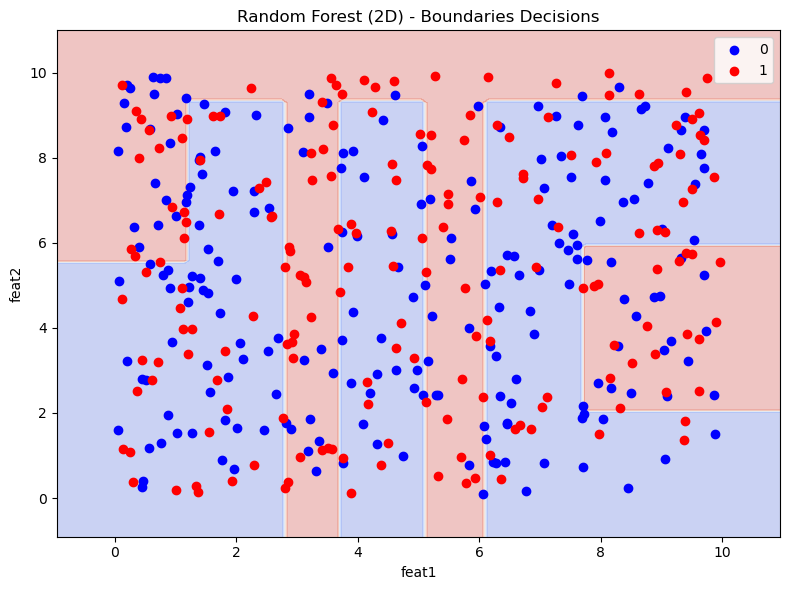

In [413]:
np.random.seed(42)
n_samples = 400

# Create a 2 features and one random y binary
X_arr = np.random.rand(n_samples, 2) * 10
y_arr = np.random.randint(0, 2, size=n_samples)

# DataFrame (2 columns), Series for y
X_2d = pd.DataFrame(X_arr, columns=["feat1", "feat2"])
y = pd.Series(y_arr, name="target")


X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y, test_size=0.3, random_state=42
)
model_forest = RandomForestClassifier(random_state=434, max_leaf_nodes=130000,verbose=0,n_jobs=5,criterion="gini"
                      ,min_samples_split=10,min_samples_leaf=20,bootstrap=False,n_estimators=100,max_features=20)
model_forest.fit(X_train, y_train)

# Meshgrid
x_min, x_max = X_2d["feat1"].min() - 1, X_2d["feat1"].max() + 1
y_min, y_max = X_2d["feat2"].min() - 1, X_2d["feat2"].max() + 1

step = 0.1 
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, step),
    np.arange(y_min, y_max, step)
)

# Flatten to set points
grid_points = np.c_[xx.ravel(), yy.ravel()]


# Prediction of the grid
preds = model_forest.predict(grid_points)


# Display 2D
plt.figure(figsize=(8, 6))


Z = preds.reshape(xx.shape)

# Create a boundary for each class
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

X_np = X_2d.to_numpy()
y_np = y.to_numpy()
mask0 = (y_np == 0)
mask1 = (y_np == 1)

plt.scatter(X_np[mask0, 0], X_np[mask0, 1], color='blue', label='0')
plt.scatter(X_np[mask1, 0], X_np[mask1, 1], color='red', label='1')

plt.xlabel("feat1")
plt.ylabel("feat2")
plt.title("Random Forest (2D) - Boundaries Decisions")
plt.legend()
plt.tight_layout()
plt.show()


### Limit Boundaries in 3D for the differents classes

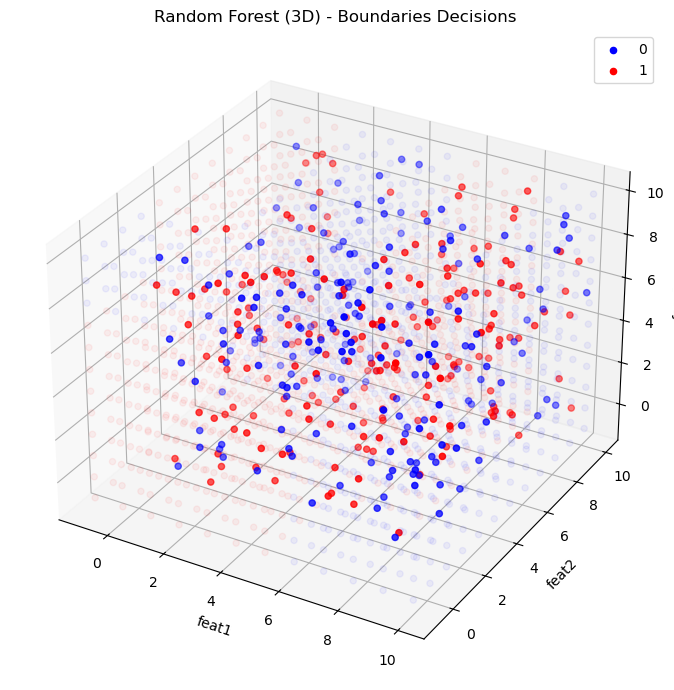

In [415]:
np.random.seed(42)
n_samples = 400

# Create a 3 features and one random y binary
X_arr = np.random.rand(n_samples, 3) * 10
y_arr = np.random.randint(0, 2, size=n_samples)

# DataFrame (3 columns), Series for y
X_3d = pd.DataFrame(X_arr, columns=["feat1", "feat2", "feat3"])
y = pd.Series(y_arr, name="target")


X_train, X_test, y_train, y_test = train_test_split(
    X_3d, y, test_size=0.3, random_state=42
)
model_forest = RandomForestClassifier(random_state=434, max_leaf_nodes=130000,verbose=0,n_jobs=5,criterion="gini"
                      ,min_samples_split=10,min_samples_leaf=20,bootstrap=False,n_estimators=100,max_features=20)
model_forest.fit(X_train, y_train)

# Create a meshgrid
x_min, x_max = X_3d["feat1"].min() - 1, X_3d["feat1"].max() + 1
y_min, y_max = X_3d["feat2"].min() - 1, X_3d["feat2"].max() + 1
z_min, z_max = X_3d["feat3"].min() - 1, X_3d["feat3"].max() + 1

# step need to be big otherwise is gonna blow memory
step = 1.0
xx, yy, zz = np.meshgrid(
    np.arange(x_min, x_max, step),
    np.arange(y_min, y_max, step),
    np.arange(z_min, z_max, step)
)


grid_points = np.column_stack([xx.ravel(), yy.ravel(), zz.ravel()])

#Predictions of grid
preds = model_forest.predict(grid_points)

# Display in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


X_3d_np = X_3d.to_numpy()    
y_np = y.to_numpy()          

mask0 = (y_np == 0)
mask1 = (y_np == 1)

ax.scatter(
    X_3d_np[mask0, 0],
    X_3d_np[mask0, 1],
    X_3d_np[mask0, 2],
    c='blue', label='0'
)
ax.scatter(
    X_3d_np[mask1, 0],
    X_3d_np[mask1, 1],
    X_3d_np[mask1, 2],
    c='red', label='1'
)


grid_class0 = grid_points[preds == 0]
grid_class1 = grid_points[preds == 1]

ax.scatter(
    grid_class0[:, 0],
    grid_class0[:, 1],
    grid_class0[:, 2],
    c='blue', alpha=0.05
)
ax.scatter(
    grid_class1[:, 0],
    grid_class1[:, 1],
    grid_class1[:, 2],
    c='red', alpha=0.05
)

ax.set_xlabel("feat1")
ax.set_ylabel("feat2")
ax.set_zlabel("feat3")
ax.set_title("Random Forest (3D) - Boundaries Decisions")
ax.legend()
plt.tight_layout()
plt.show()


### Conclusion 5

We can in the graphics 2D and 3D :
- The model predicts much the class 0 against class 1 the problem is the balance between class is not very good.
- The model don't split the limit between the both class so is so complicate to know the limit 

The problem of this because the model don't choose strong features , the features have much impact in the target to draw very well the boundaries.

### Final Conclusion

For this project in general the many keys and many challenges are:
- Have so much the outliers we need to remove or reduce the most possible
- The best model for type case sometimes is **Random Forest** but that's depend for many factors sometimes perhaps the GradientBoosting or Others.
- The most important feature is **Duration**
- We don't have the boundaries decisions very well and the model predict much the class 0 because the balance between differents class is not unfair.

So that's for this project . We gonna work on another project on the medicine and using **XGBoost, CatBoost and LGBM** to see the main key between the three.